# Predicting Housing Prices

We will only use numerical features

In [120]:
import pandas as pd

url = "https://drive.google.com/file/d/1NgQkE_mwiU9X_g13WShI3rrKhIxiT5jV/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

housing = data = pd.read_csv(path)
housing = housing.select_dtypes(include=['number']).copy()
housing.drop(columns=["Id"], inplace=True)

In [121]:
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Data splitting

In [122]:
from sklearn.model_selection import train_test_split

# define X and y (features and target)
X = housing.drop(columns="SalePrice")
y = housing["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


## Data Scaling

In [123]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train_ = minmax.fit_transform(X_train)

In [124]:
X_train_scaled = pd.DataFrame(X_train_, columns=X.columns)

## Feature Selection


Some features, like "PoolArea", have very low variance. It is a same way of saying "very little information". We will kick out these features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [125]:
X_train_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,967.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.220865,0.166516,0.042371,0.561644,0.571169,0.713005,0.570434,0.063252,0.079973,0.032176,...,0.329258,0.128656,0.085851,0.072774,0.006180,0.033180,0.004079,0.003955,0.484823,0.450557
std,0.250193,0.084685,0.050519,0.154367,0.141451,0.218855,0.346709,0.112252,0.081457,0.109854,...,0.151302,0.168645,0.123294,0.189362,0.058036,0.123663,0.057391,0.035482,0.247466,0.333706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.123288,0.028143,0.444444,0.500000,0.586957,0.266667,0.000000,0.000000,0.000000,...,0.220028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.164384,0.037064,0.555556,0.500000,0.721014,0.716667,0.000000,0.069897,0.000000,...,0.334274,0.000000,0.042065,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.294118,0.202055,0.046637,0.666667,0.625000,0.927536,0.900000,0.100625,0.127746,0.000000,...,0.406206,0.228261,0.124283,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
X_train_scaled.var()

MSSubClass       0.062596
LotFrontage      0.007172
LotArea          0.002552
OverallQual      0.023829
OverallCond      0.020008
YearBuilt        0.047897
YearRemodAdd     0.120207
MasVnrArea       0.012601
BsmtFinSF1       0.006635
BsmtFinSF2       0.012068
BsmtUnfSF        0.040297
TotalBsmtSF      0.005207
1stFlrSF         0.007818
2ndFlrSF         0.044072
LowQualFinSF     0.007380
GrLivArea        0.009727
BsmtFullBath     0.067601
BsmtHalfBath     0.015330
FullBath         0.033992
HalfBath         0.062545
BedroomAbvGr     0.010799
KitchenAbvGr     0.005561
TotRmsAbvGrd     0.018384
Fireplaces       0.048355
GarageYrBlt      0.056327
GarageCars       0.034940
GarageArea       0.022892
WoodDeckSF       0.028441
OpenPorchSF      0.015201
EnclosedPorch    0.035858
3SsnPorch        0.003368
ScreenPorch      0.015293
PoolArea         0.003294
MiscVal          0.001259
MoSold           0.061239
YrSold           0.111360
dtype: float64

In [127]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05)
X_train_F = selector.fit_transform(X_train_scaled)

In [128]:
# those are the indices of the columns kept
kept_columns = selector.get_support(indices=True)
kept_columns

array([ 0,  6, 16, 19, 24, 34, 35])

In [129]:
# those are the column names
kept_columns_names = X_train_scaled.columns[kept_columns]
kept_columns_names

Index(['MSSubClass', 'YearRemodAdd', 'BsmtFullBath', 'HalfBath', 'GarageYrBlt',
       'MoSold', 'YrSold'],
      dtype='object')

In [130]:
X_train_selected = pd.DataFrame(X_train_F, columns=kept_columns_names)
X_train_selected

,MSSubClass,YearRemodAdd,BsmtFullBath,HalfBath,GarageYrBlt,MoSold,YrSold
0,0.000000,0.283333,0.0,0.0,0.586538,0.545455,0.75
1,0.235294,0.850000,0.5,0.5,0.913462,0.363636,0.25
2,0.000000,0.966667,0.5,0.5,0.625000,0.272727,1.00
3,0.235294,0.716667,0.0,0.5,0.836538,0.454545,0.50
4,0.235294,0.416667,0.5,0.5,0.663462,0.090909,0.00
...,...,...,...,...,...,...,...
1163,0.176471,0.883333,0.0,0.0,0.423077,0.454545,0.00
1164,0.000000,0.866667,0.5,0.0,0.913462,0.454545,0.75
1165,0.176471,0.533333,0.5,0.0,0.326923,0.545455,0.50
1166,0.823529,0.916667,0.0,0.5,0.951923,0.272727,0.00


## Missing data

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [131]:
X_train_selected.isna().sum()

MSSubClass       0
YearRemodAdd     0
BsmtFullBath     0
HalfBath         0
GarageYrBlt     70
MoSold           0
YrSold           0
dtype: int64

In [132]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

In [133]:
X_train_ready = imputer.fit_transform(X_train_selected)
X_train_ready = pd.DataFrame(X_train_ready, columns=kept_columns_names)
X_train_ready.isna().sum()

MSSubClass      0
YearRemodAdd    0
BsmtFullBath    0
HalfBath        0
GarageYrBlt     0
MoSold          0
YrSold          0
dtype: int64

## Modelling

### KNN

In [134]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    "n_neighbors": range(1, 150),
    "weights": ['uniform', 'distance']
}

In [135]:
list(range(1, 150))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [136]:
from sklearn.model_selection import RandomizedSearchCV


knn_search = RandomizedSearchCV(KNeighborsRegressor(),
                                   param_grid,
                                   scoring="neg_mean_absolute_error",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

In [137]:
knn_search.fit(X_train_ready, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'n_neighbors': range(1, 150),
                                        'weights': ['uniform', 'distance']},
                   random_state=123, scoring='neg_mean_absolute_error')

In [138]:
knn_search.best_params_

{'weights': 'uniform', 'n_neighbors': 28}

In [139]:
- knn_search.best_score_

42051.699898206236

## Testing

In [140]:
X_test_scaled = minmax.transform(X_test)
X_test_selection = selector.transform(X_test_scaled)
X_test_ready = imputer.transform(X_test_selection)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [141]:
test_predictions = knn_search.predict(X_test_ready)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [142]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_predictions, y_test)

41362.45205479452

In [143]:
test_results = {}

test_results["knn"] = mean_absolute_error(test_predictions, y_test)

# Predicting Housing Prices With Tensorflow

Following this example: https://www.tensorflow.org/tutorials/keras/regression

## Converting Dataframe to tensor

In [144]:
X_train_ready.head()

,MSSubClass,YearRemodAdd,BsmtFullBath,HalfBath,GarageYrBlt,MoSold,YrSold
0,0.000000,0.283333,0.0,0.0,0.586538,0.545455,0.75
1,0.235294,0.850000,0.5,0.5,0.913462,0.363636,0.25
2,0.000000,0.966667,0.5,0.5,0.625000,0.272727,1.00
3,0.235294,0.716667,0.0,0.5,0.836538,0.454545,0.50
4,0.235294,0.416667,0.5,0.5,0.663462,0.090909,0.00


In [145]:
X_train_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1168 non-null   float64
 1   YearRemodAdd  1168 non-null   float64
 2   BsmtFullBath  1168 non-null   float64
 3   HalfBath      1168 non-null   float64
 4   GarageYrBlt   1168 non-null   float64
 5   MoSold        1168 non-null   float64
 6   YrSold        1168 non-null   float64
dtypes: float64(7)
memory usage: 64.0 KB


In [146]:
import tensorflow as tf

In [147]:
#X_train_ready.values
#tf.convert_to_tensor(X_train_ready.values)
#tf.convert_to_tensor(X_train_ready)

In [148]:
X_train_tensor = tf.convert_to_tensor(X_train_ready.values)
X_train_tensor_df_results = tf.convert_to_tensor(X_train_ready)

X_train_tensor

<tf.Tensor: shape=(1168, 7), dtype=float64, numpy=
array([[0.        , 0.28333333, 0.        , ..., 0.58653846, 0.54545455,
        0.75      ],
       [0.23529412, 0.85      , 0.5       , ..., 0.91346154, 0.36363636,
        0.25      ],
       [0.        , 0.96666667, 0.5       , ..., 0.625     , 0.27272727,
        1.        ],
       ...,
       [0.17647059, 0.53333333, 0.5       , ..., 0.32692308, 0.54545455,
        0.5       ],
       [0.82352941, 0.91666667, 0.        , ..., 0.95192308, 0.27272727,
        0.        ],
       [0.        , 0.41666667, 0.5       , ..., 0.66346154, 1.        ,
        0.        ]])>

In [149]:
y_train_tensor = tf.convert_to_tensor(y_train)
y_train_tensor

<tf.Tensor: shape=(1168,), dtype=int64, numpy=array([100000, 226000, 149900, ..., 145000, 144152, 280000])>

## Linear Regression

https://www.tensorflow.org/tutorials/keras/regression

First we define the model as a single-layer neural network:

In [150]:
lr_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

### Compile the model

Here we choose:

- The optimizer: which will define how we approach the right parameters for the model
- The loss function: whcih quantifies the error

In [151]:
lr_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error')

In [152]:
# these predictions make no sense, because the parameters have not been tuned yet
# we get random predictions

lr_model.predict(X_train_tensor[:10])


1/1 [==============================] - 0s 99ms/step


array([[0.7818683],
       [1.5796056],
       [1.946559 ],
       [1.2794272],
       [1.05354  ],
       [0.560519 ],
       [1.3933756],
       [1.2636273],
       [0.5113052],
       [1.4600968]], dtype=float32)

In [153]:
%%time
history = lr_model.fit(
    X_train_tensor,
    y_train_tensor,
    epochs=3000, # define number of iterations
    verbose=0, # suppress logging
    validation_split = 0.2)  # Calculate validation results on 20% of the training data

CPU times: user 5min 30s, sys: 22.5 s, total: 5min 52s
Wall time: 5min 22s


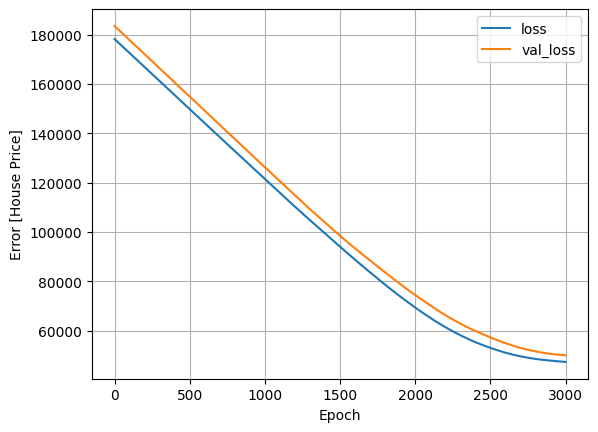

In [154]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [House Price]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


### Performance on the test set

In [155]:
from sklearn.metrics import mean_absolute_error

tf_lr_model_predictions = lr_model.predict(X_test_ready)
# way number of 1
mean_absolute_error(y_test, tf_lr_model_predictions)

10/10 [==============================] - 0s 2ms/step


48945.11860552226

In [156]:
# way number 2 to evaluate
import numpy as np

lr_model.evaluate(
    X_test_ready,
    np.array(y_test), verbose=0)

48945.1171875

In [157]:
test_results['linear_model'] = lr_model.evaluate(
    X_test_ready,
    np.array(y_test), verbose=0)

In [158]:
test_results

{'knn': 41362.45205479452, 'linear_model': 48945.1171875}

## 2nd NN model

A "deep model"

In [159]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

In [160]:
deep_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [161]:
%%time
history = deep_model.fit(
    X_train_tensor, y_train_tensor,
    epochs=50,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 8.14 s, sys: 380 ms, total: 8.52 s
Wall time: 7.9 s


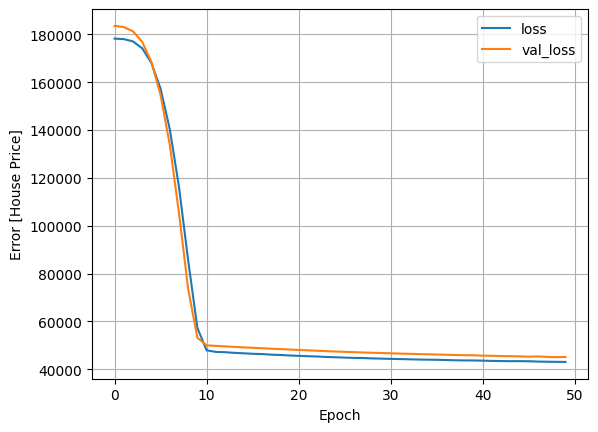

In [162]:
plot_loss(history)


In [163]:
test_results['deep_model'] = deep_model.evaluate(
    X_test_ready,
    np.array(y_test), verbose=0)

In [164]:
test_results

{'knn': 41362.45205479452,
 'linear_model': 48945.1171875,
 'deep_model': 42891.96484375}

# 3rd iteration

A "deeper" model

## Add more layers

## Tide up the code in a function

## Evaluate your model

In [171]:
def neural_network_more_layers(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor):
    deep_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=24, activation="relu"),
    tf.keras.layers.Dense(units=1)
    ])

    deep_model_1.compile(
         optimizer=tf.optimizers.Adam(learning_rate=0.01),
         loss='mean_absolute_error')

    history_1 = deep_model_1.fit(
             X_train_tensor, y_train_tensor,
             epochs=50,
             # suppress logging
             verbose=0,
             # Calculate validation results on 20% of the training data
             validation_split = 0.2)

    test_results['deep_model_1'] = deep_model_1.evaluate(
                                                 x_test_tensor,
                                                 np.array(y_test_tensor), verbose=0)

    return plot_loss(history_1), test_results

(None,
 {'knn': 41362.45205479452,
  'linear_model': 48945.1171875,
  'deep_model': 42891.96484375,
  'deep_model_1': 41625.765625})

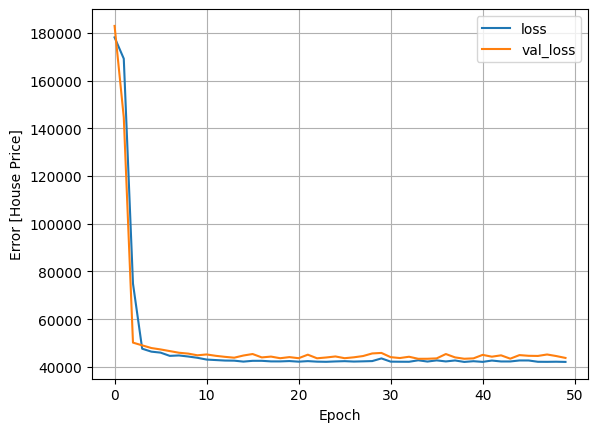

In [172]:
neural_network_more_layers(X_train_tensor, y_train_tensor, X_test_ready, y_test)